In [1]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install scikit-learn
!pip install scipy

import numpy as np
import sys
import pandas as pd
import scipy as sp
import tensorflow as tf
import builtins
import os
import pickle
import time
import pylab
import cv2
import keras
import sys
import csv
from matplotlib import pyplot as plt
from sklearn import preprocessing

D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [2]:
#Считываем датасет

flats = pd.read_csv("flats_moscow.csv")
#flats.head()
flats.columns
#flats.describe(include = "all")
#print(flats)
#phones.price_range

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C2A75C288>,
      dtype=object)

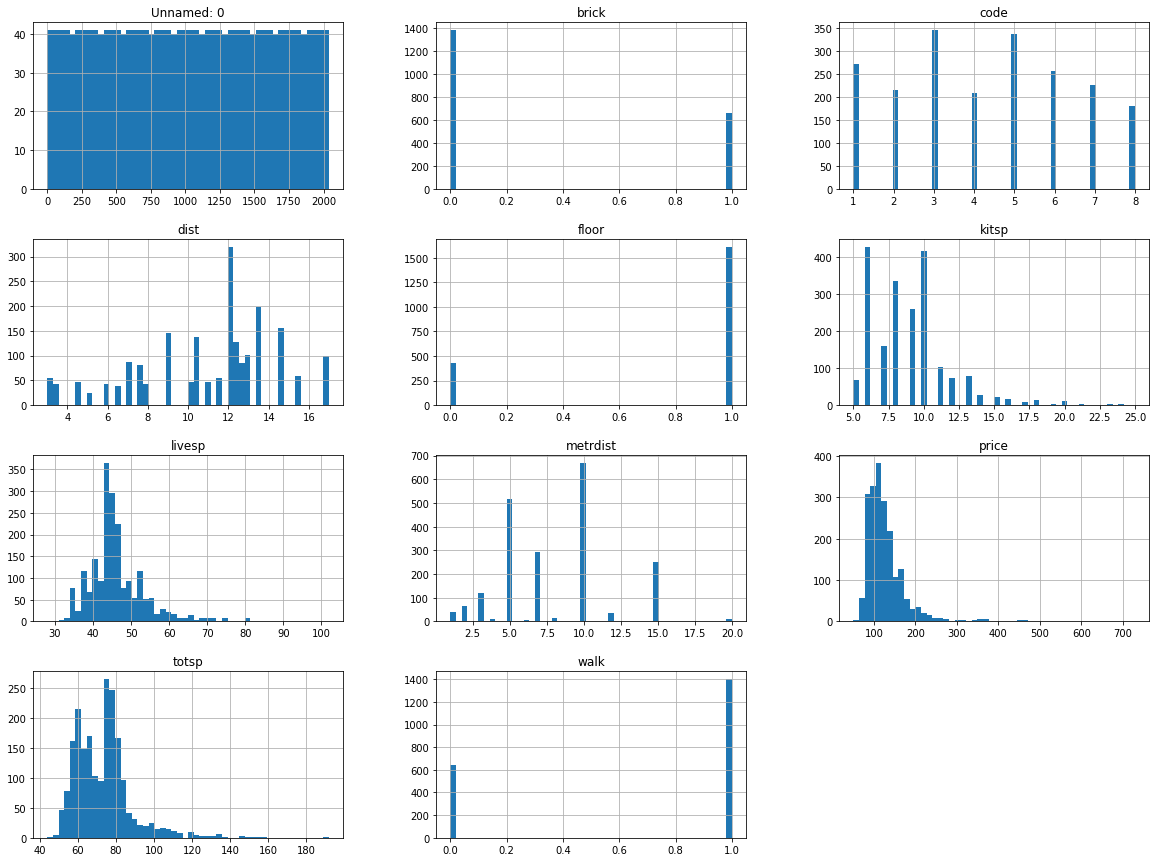

In [3]:
#Анализируем датасет
%matplotlib inline
flats.hist(bins=50,figsize=(20,15))

In [4]:
#Корреляция 1
corr = flats.corr()
print(corr["price"].sort_values(ascending = False))#totsp, livesp, kitsp, brick, walk и floor - хорошие признаки. Их возьму
#

price         1.000000
totsp         0.756042
livesp        0.729614
kitsp         0.597235
brick         0.260835
walk          0.151996
floor         0.132564
Unnamed: 0   -0.022761
code         -0.089623
metrdist     -0.152116
dist         -0.331563
Name: price, dtype: float64


In [5]:
#Нормализуем признаки
x = flats[["totsp"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
flats_n = pd.DataFrame(x_norm)
flats_n['totsp'] = pd.DataFrame(x_norm)

x = flats[["livesp"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
flats_n['livesp'] = pd.DataFrame(x_norm)

x = flats[["kitsp"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
flats_n['kitsp'] = pd.DataFrame(x_norm)

x = flats[["brick"]].values.astype(float)#нормирую и бинарные признаки, за компанию
min_max = preprocessing.MinMaxScaler()#по приколу
x_norm = min_max.fit_transform(x)
flats_n['brick'] = pd.DataFrame(x_norm)

x = flats[["walk"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
flats_n['walk'] = pd.DataFrame(x_norm)

x = flats[["floor"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
flats_n['floor'] = pd.DataFrame(x_norm)

x = flats[["dist"]].values.astype(float)
x = np.abs(x)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
flats_n['dist'] = pd.DataFrame(x_norm)

flats_n['price'] = flats['price']
del flats_n[0]

print(flats_n)

         totsp    livesp  kitsp  brick  walk  floor      dist  price
0     0.094595  0.162162   0.05    1.0   1.0    1.0  0.678571     81
1     0.000000  0.000000   0.05    0.0   1.0    1.0  0.750000     75
2     0.175676  0.189189   0.05    1.0   1.0    1.0  0.821429    128
3     0.114865  0.121622   0.05    0.0   1.0    1.0  0.750000     95
4     0.405405  0.432432   0.30    1.0   0.0    1.0  0.535714    330
...        ...       ...    ...    ...   ...    ...       ...    ...
2035  0.222973  0.229730   0.25    0.0   0.0    1.0  0.642857    110
2036  0.108108  0.202703   0.05    0.0   0.0    1.0  0.428571     95
2037  0.108108  0.243243   0.00    0.0   1.0    1.0  0.535714     95
2038  0.216216  0.270270   0.25    0.0   0.0    1.0  0.678571    129
2039  0.135135  0.229730   0.10    0.0   1.0    1.0  0.892857    103

[2040 rows x 8 columns]


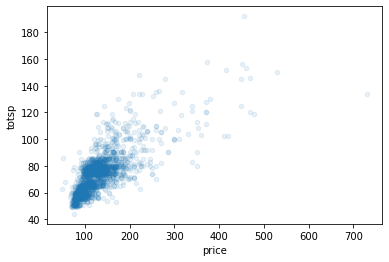

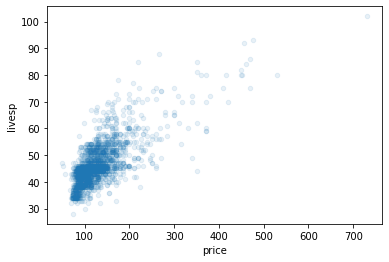

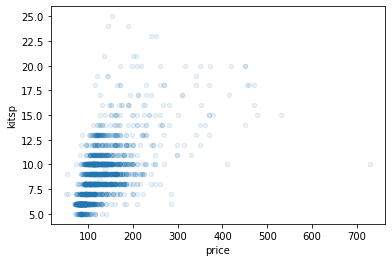

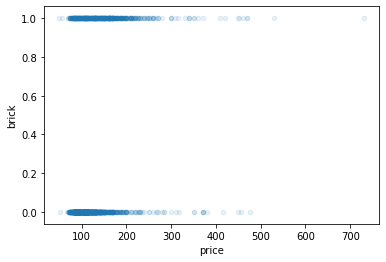

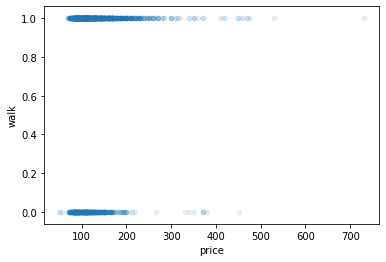

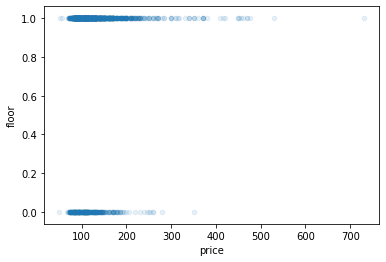

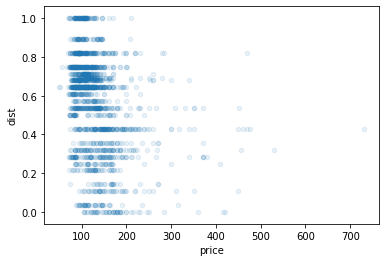

In [6]:
#Продолжаем анализировать датасет

flats.plot(kind = "scatter", x = "price", y = "totsp", alpha = 0.1)#price_range(ram), ram(fc)
flats.plot(kind = "scatter", x = "price", y = "livesp", alpha = 0.1)#price_range(ram), ram(fc)
flats.plot(kind = "scatter", x = "price", y = "kitsp", alpha = 0.1)#price_range(ram), ram(fc)
flats.plot(kind = "scatter", x = "price", y = "brick", alpha = 0.1)#price_range(ram), ram(fc)
flats.plot(kind = "scatter", x = "price", y = "walk", alpha = 0.1)#price_range(ram), ram(fc)
flats.plot(kind = "scatter", x = "price", y = "floor", alpha = 0.1)#price_range(ram), ram(fc)
flats_n.plot(kind = "scatter", x = "price", y = "dist", alpha = 0.1)#price_range(ram), ram(fc)

#последние два признака вызывают сомнения, но я попробую решить задачу с ними
#выглядит интригующе

In [13]:
#Решаю задачу
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df1 = flats_n.iloc[:1500, :]
df2 = flats_n.iloc[1500:, :]
x_train = df1.drop(['price'], axis = 1)
y_train = df1['price']
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(df2)
model.predict(df2.drop(['price'], axis = 1))

#как видно, ошибка +- пара тысяч долларов, но в целом все окей

         totsp    livesp  kitsp  brick  walk  floor      dist  price
1500  0.101351  0.135135   0.05    1.0   1.0    0.0  0.750000     93
1501  0.304054  0.310811   0.25    0.0   1.0    1.0  0.642857    140
1502  0.250000  0.243243   0.15    0.0   1.0    1.0  0.642857    121
1503  0.108108  0.216216   0.05    0.0   0.0    1.0  0.750000     80
1504  0.087838  0.121622   0.05    0.0   1.0    0.0  0.750000     68
...        ...       ...    ...    ...   ...    ...       ...    ...
2035  0.222973  0.229730   0.25    0.0   0.0    1.0  0.642857    110
2036  0.108108  0.202703   0.05    0.0   0.0    1.0  0.428571     95
2037  0.108108  0.243243   0.00    0.0   1.0    1.0  0.535714     95
2038  0.216216  0.270270   0.25    0.0   0.0    1.0  0.678571    129
2039  0.135135  0.229730   0.10    0.0   1.0    1.0  0.892857    103

[540 rows x 8 columns]


array([ 83.13490356, 158.74937391, 135.57502141,  83.29500784,
        73.30440192, 138.48723408, 151.66511326,  91.39708643,
       224.66339994, 100.14764404, 147.3242727 ,  92.26725642,
       119.80211747, 105.10059058,  81.75805343, 101.94743986,
       152.92482955, 131.63738336, 161.98405416,  93.39909249,
       105.32013264, 148.94469641,  99.21955194,  72.38889546,
       129.67568649, 172.91381733, 141.53988989, 145.4903227 ,
       281.62265852,  98.86969487,  87.180416  , 138.70755007,
        76.86507931, 333.21697282, 149.05544555, 133.29241337,
        89.43865593, 103.14454935, 107.27689494,  83.4720834 ,
       106.01141123, 225.18372981, 147.48064564,  60.4909963 ,
       137.09098587, 133.93843605, 126.2337083 , 117.95403382,
        94.3883361 , 139.57021   , 110.81800432,  52.34594303,
       134.89704952, 195.71033933, 224.55205583, 167.54033343,
       105.29397616,  99.07589217, 154.2984053 , 131.48598357,
       129.63237874, 103.63543353, 109.39567431, 103.90